### Módulo 3 | PAIR PROGRAMMING | Regresión 3 | 27/05/22 | Almudena & Lara

In [146]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm


Toma únicamente las variables de tipo numérico del dataset.


In [147]:
df = pd.read_csv("mdc.csv", index_col=0, encoding="latin-1")
df_n = df.select_dtypes(include=np.number)
df_n.head(3)

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
1,1944,244,5.5,844,0,0,1,82,250,1
2,1986,110,4.7,44073,16300000,13,78,38,50000,2
3,1998,120,7.1,251243,70090000,55,103,78,250000,3


# EJERCICIO 1

- Realiza un EDA explicando algunas de las cosas interesantes del conjunto de datos.





In [148]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           90 non-null     int64  
 1   runtime        90 non-null     int64  
 2   imdb_rating    90 non-null     float64
 3   imdb_votes     90 non-null     int64  
 4   imdb_gross     90 non-null     int64  
 5   tomato_meter   90 non-null     int64  
 6   tomato_review  90 non-null     int64  
 7   tom_aud_score  90 non-null     int64  
 8   tom_ratings    90 non-null     int64  
 9   id             90 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 7.7 KB


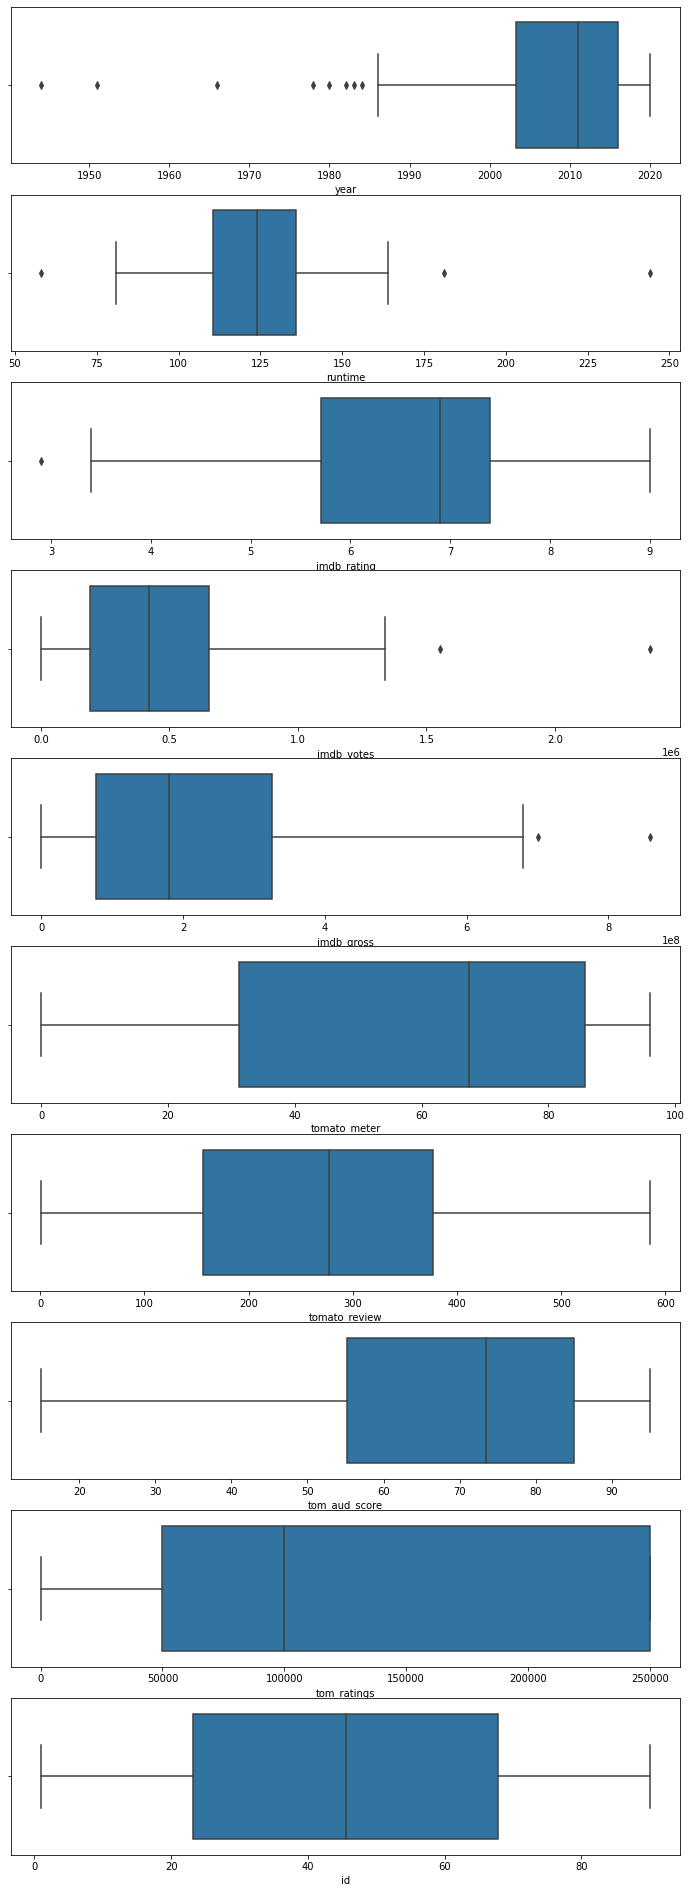

In [149]:
i=0
fig, ax = plt.subplots(10, 1, figsize = (12, 34))
for column in df_n.columns:
    if i < len(df_n.columns):
        sns.boxplot(x=column, data= df_n, ax=ax[i])
        i=i+1
        plt.xlabel(column)
plt.show()

- Obtén la matriz de correlacion de las variables y estudia los resultados explicando las diferentes correlaciones con las variables.


In [150]:
df_n.corr()

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
year,1.000000,0.044585,0.359359,0.422111,0.475202,0.364634,0.805667,0.247838,0.003614,0.116433
runtime,0.044585,1.000000,0.446700,0.389172,0.456719,0.346371,0.357158,0.445957,0.058961,0.063493
imdb_rating,0.359359,0.446700,1.000000,0.746724,0.687473,0.844454,0.610746,0.904942,0.181519,-0.043480
imdb_votes,0.422111,0.389172,0.746724,1.000000,0.728443,0.606024,0.571421,0.610921,0.284994,0.055995
imdb_gross,0.475202,0.456719,0.687473,0.728443,1.000000,0.636157,0.718219,0.558974,0.087181,0.058781
tomato_meter,0.364634,0.346371,0.844454,0.606024,0.636157,1.000000,0.550145,0.763188,0.140422,0.001191
tomato_review,0.805667,0.357158,0.610746,0.571421,0.718219,0.550145,1.000000,0.537157,-0.153274,0.215934
tom_aud_score,0.247838,0.445957,0.904942,0.610921,0.558974,0.763188,0.537157,1.000000,0.022859,-0.003020
tom_ratings,0.003614,0.058961,0.181519,0.284994,0.087181,0.140422,-0.153274,0.022859,1.000000,-0.387374
id,0.116433,0.063493,-0.043480,0.055995,0.058781,0.001191,0.215934,-0.003020,-0.387374,1.000000


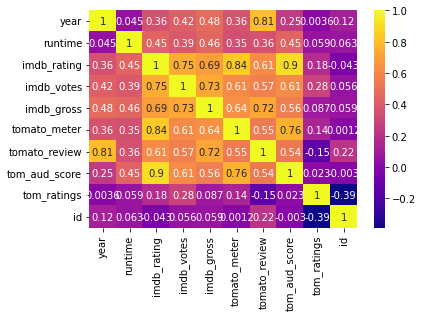

In [151]:
plt.figure()
sns.heatmap(df_n.corr(), annot=True, cmap = 'plasma')
plt.show()

<font color = "orange"> Algunas de las variables que más se correlacionan son:
- imdb_rating & imdb_votes (0.75)
- tomato_review & year (0.81)
- tomato_meter & tomato_score (0.76)
- tomato_score & imdb_rating (0.9)

-   Limpia los datos de trabajo en caso de que sea necesario.


<font color=orange> Realizamos un escalado de las variables numéricas:

In [152]:
scaler = StandardScaler()
scaler.fit(df_n)

col_escaladas = scaler.transform(df_n)

df_escalado = pd.DataFrame(col_escaladas, columns = df_n.columns)
df_escalado.head(2)

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
0,-4.375529,5.123971,-0.832131,-1.217868,-1.229057,-2.046064,-1.854111,0.677915,-1.537205,-1.712912
1,-1.429412,-0.604692,-1.464796,-1.104512,-1.134723,-1.602010,-1.317328,-1.275902,-1.027573,-1.674419


-  Realiza el ajuste lineal múltiple mostrando las métricas.

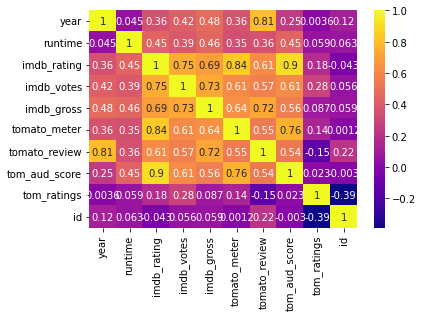

In [153]:
#Comprobamos que con la estandarización de nuestras variables, las relaciones entre ellas se mantienen iguales. O sea, somos unas genias. O sea, aplausos.

plt.figure()
sns.heatmap(df_escalado.corr(), annot=True, cmap = 'plasma')
plt.show()

> <font color=orange>**Elegimos las variables sobre las que hacer la regresión lineal múltiple**
>
> Variable dependiente: imdb_rating
>
>Variables independientes: 
>- v1 = imdb_votes
>- v2 = tom_aud_score

In [154]:
ind = df_escalado[["imdb_votes", "tom_aud_score"]]
dep = df_escalado["imdb_rating"]

In [155]:
# Separamos la muestra de los conjuntos train/test 80/20.
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.2)

In [156]:
# Relizamos la regresión lineal. Ajustándola a nuestros datos de entrenamiento para las variables independientes y la dependiente.
LR = LinearRegression() 
LR.fit(ind_train, dep_train)

#Creamos una predicción de la variable dependiente, a partir de los datos de las independientes (entrenamiento)
dep_prediction_train =  LR.predict(ind_train)

In [157]:
#Calculamos el R2_ajustado para nuestras muestras de entrenamiento:

r2_ajustado_train = 1 - (1-r2_score(dep_train,dep_prediction_train)) * (ind_train.shape[0]-1)/(ind_train.shape[0]- ind_train.shape[1]-1)
r2_ajustado_train


0.8854132874430463

In [158]:
#Realizamos una predicción de la variable dependiente a partir de los datos de test de las independientes:
dep_prediction =  LR.predict(ind_test)
dep_prediction

array([-0.6899859 , -0.80124731,  0.43620859,  0.0979198 ,  0.57835357,
        0.19776462,  0.9778091 ,  2.56760015,  1.6610586 , -0.1097733 ,
        0.58684338,  0.65422828, -1.75040619,  0.05176459, -0.33946195,
        0.80423772, -0.45476971,  0.80858397])

In [159]:
# Calculamos el R2_ajustado entre las predicciones de la variable dependiente, y los datos de test:
r2_ajustado_test = 1 - (1-r2_score(dep_test, dep_prediction)) * (ind_test.shape[0]-1)/(ind_test.shape[0]- ind_test.shape[1]-1)
r2_ajustado_test

0.7803081549856609

# EJERCICIO 2
- Toma ahora el dataset incluyendo las variables categóricas.


<font color=orange> En el ajuste linear múltiple anterior solo usamos 2 variables independientes, no todo el dataset. Por eso, para esta parte del ejercicio - y teniendo en cuenta que casi todas nuestras variables categóricas están compuestas de valores únicos (por ejemplo: director/a de la película), vamos a añadir la variable de "entity", que corresponde a la productora de la película: MARVEL o DC.
Trabajaremos pues con un dataframe de 4 columnas, y codificaremos la categórica.

In [160]:
df2 = df[["imdb_rating", "imdb_votes", "tom_aud_score", "entity"]]
df2.head()

,imdb_rating,imdb_votes,tom_aud_score,entity
1,5.5,844,82,MARVEL
2,4.7,44073,38,MARVEL
3,7.1,251243,78,MARVEL
4,7.4,580354,83,MARVEL
5,6.7,203813,68,MARVEL


- Realiza el EDA de las variables categóricas que se va a incluir en el modelo.



<font color = orange> Observamos que la variable "entity" tiene 90 entradas, ningún registro nulo, son dos los valores únicos: Marvel y DC.

In [161]:
df2["entity"].describe()

count         90
unique         2
top       MARVEL
freq          57
Name: entity, dtype: object

<AxesSubplot:xlabel='entity', ylabel='count'>

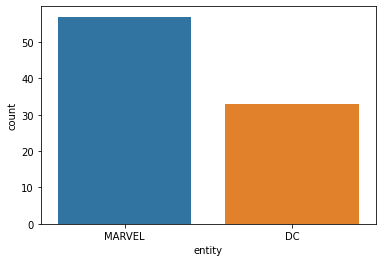

In [162]:
sns.countplot(x="entity", data=df2)

- Utiliza algun tipo de codificación para las variables numéricas.


In [163]:
var = ind = df2["entity"].values.reshape(-1, 1)

enc = OneHotEncoder()
trans = enc.fit_transform(var)
df2[["Marvel", "DC"]] = pd.DataFrame(trans.toarray())

#oh_df = pd.DataFrame()
#oh_df.rename(columns = {0: "Marvel", 1: "DC"})

/home/adalaber/.local/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [164]:
df2.head()

,imdb_rating,imdb_votes,tom_aud_score,entity,Marvel,DC
1,5.5,844,82,MARVEL,0.0,1.0
2,4.7,44073,38,MARVEL,0.0,1.0
3,7.1,251243,78,MARVEL,0.0,1.0
4,7.4,580354,83,MARVEL,0.0,1.0
5,6.7,203813,68,MARVEL,0.0,1.0


In [168]:
df2 = df2.drop("entity", axis=1)

- Realiza la misma limpieza de datos, en caso necesario, aplicada en el dataset del apartado para dejar las variables numéricas limpias.



In [170]:
scaler = StandardScaler()
col_escaladas2 = scaler.fit_transform(df2)

df_escalado = pd.DataFrame(col_escaladas2, columns = df2.columns)
df_escalado.head(2)

,imdb_rating,imdb_votes,tom_aud_score,Marvel,DC
0,-0.832131,-1.217868,0.677915,-0.767649,0.767649
1,-1.464796,-1.104512,-1.275902,-0.767649,0.767649


- Obten el ajuste lineal múltiple incluyendo las variables categóricas

# EJERCICIO 3
Compara las métricas obtenidas del ajuste con las varaibles numerícas y con el modelo que incluia las variables categóricas. Explica los resultados obtenidos, pensando en posibles explicaciones.